<a href="https://colab.research.google.com/github/RC11-SkillsClass2022-23/XingFeng/blob/main/Julian_assignment/VectoriseImagesAndFilm/XingFengIstanbulImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np

In [2]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [3]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

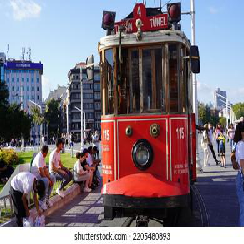

In [4]:
tram_image_id = os.listdir('/content/drive/MyDrive/SkillWorkshop/IstanbulImageClassification/Istanbul_heritage_tram')[0]
tram_path = os.path.join('/content/drive/MyDrive/SkillWorkshop/IstanbulImageClassification/Istanbul_heritage_tram', tram_image_id)
tram_image = load_image(tram_path)

tf.keras.preprocessing.image.load_img(tram_path, target_size=(244,244))

In [5]:
print(f'shape: {tram_image.shape}')
print(f'type: {type(tram_image)}')

shape: (1, 224, 224, 3)
type: <class 'numpy.ndarray'>


In [6]:
model.predict(tram_image)

1/1 [==============================] - 1s 1s/step


array([[2.05813588e-08, 7.83239571e-08, 1.72454317e-09, 1.22689803e-09,
        3.80111009e-09, 2.55402877e-09, 1.14230569e-10, 3.45121066e-07,
        5.19676249e-08, 5.35570521e-08, 3.79889400e-08, 2.40886795e-08,
        3.18582977e-07, 1.46263046e-08, 5.58631086e-07, 1.33089202e-08,
        2.56870081e-08, 2.13618634e-09, 8.84454021e-09, 1.17161014e-09,
        2.53580179e-09, 1.78076043e-08, 8.97061481e-10, 1.40145019e-07,
        1.19117578e-08, 5.25461896e-09, 6.53287557e-08, 2.00991472e-08,
        3.39184290e-08, 2.69104596e-08, 6.24823826e-07, 3.52401344e-08,
        1.13441990e-06, 4.32687877e-08, 1.41587622e-08, 5.91366849e-08,
        5.25724815e-08, 3.77029430e-08, 1.28855234e-07, 1.00640900e-08,
        1.07099951e-09, 9.83534409e-09, 5.95114429e-08, 3.22813456e-08,
        3.35499872e-09, 3.79002110e-08, 5.05930675e-09, 1.67992003e-08,
        1.07808582e-07, 9.99249661e-09, 6.21309093e-09, 2.02615680e-09,
        2.08901119e-09, 1.72504000e-09, 8.72400907e-09, 3.665033

In [7]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

17225924/17225924 [==============================] - 0s 0us/step


In [8]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [9]:
model.predict(tram_image).shape

1/1 [==============================] - 1s 844ms/step


(1, 1024)

In [10]:
x = Dropout(rate=0.4)(model.output)
x = Dense(4)(x)
x = Softmax()(x)
model = Model(model.inputs, x)

In [11]:
for layer in model.layers[:-3]:
  layer.trainable = False

In [12]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [13]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    '/content/drive/MyDrive/SkillWorkshop/IstanbulImageClassification', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    '/content/drive/MyDrive/SkillWorkshop/IstanbulImageClassification',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 1086 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


In [14]:
batch_size = 32

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    epochs=10,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Epoch 1/10
33/33 [==============================] - ETA: 0s - loss: 1.1560

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


33/33 [==============================] - 257s 8s/step - loss: 1.1560 - val_loss: 0.2265
Epoch 2/10
33/33 [==============================] - 118s 4s/step - loss: 0.3126 - val_loss: 0.1346
Epoch 3/10
33/33 [==============================] - 120s 4s/step - loss: 0.2201 - val_loss: 0.0912
Epoch 4/10
33/33 [==============================] - 121s 4s/step - loss: 0.1761 - val_loss: 0.0556
Epoch 5/10
33/33 [==============================] - 128s 4s/step - loss: 0.1540 - val_loss: 0.0373
Epoch 6/10
33/33 [==============================] - 119s 4s/step - loss: 0.1203 - val_loss: 0.0480
Epoch 7/10
33/33 [==============================] - 120s 4s/step - loss: 0.1276 - val_loss: 0.0584
Epoch 8/10
33/33 [==============================] - 120s 4s/step - loss: 0.1150 - val_loss: 0.0379
Epoch 9/10
33/33 [==============================] - 122s 4s/step - loss: 0.0914 - val_loss: 0.0556
Epoch 10/10
33/33 [==============================] - 130s 4s/step - loss: 0.0998 - val_loss: 0.0278


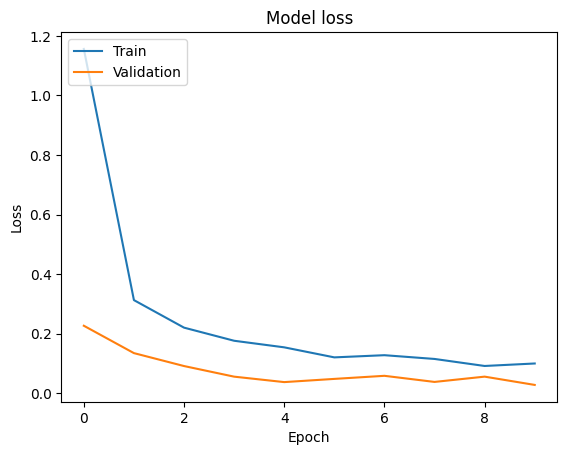

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [38]:
random_stall = random.choice(os.listdir('/content/drive/MyDrive/SkillWorkshop/IstanbulImageClassification/Istanbul_doner_kebab_stall'))
stall_path = os.path.join('/content/drive/MyDrive/SkillWorkshop/IstanbulImageClassification/Istanbul_doner_kebab_stall',random_stall)
stall = load_image(stall_path)
random_tram = random.choice(os.listdir('/content/drive/MyDrive/SkillWorkshop/IstanbulImageClassification/Istanbul_heritage_tram'))
tram_path = os.path.join('/content/drive/MyDrive/SkillWorkshop/IstanbulImageClassification/Istanbul_heritage_tram',random_tram)
tram = load_image(tram_path)
random_mosque = random.choice(os.listdir('/content/drive/MyDrive/SkillWorkshop/IstanbulImageClassification/Istanbul_mosque'))
mosque_path = os.path.join('/content/drive/MyDrive/SkillWorkshop/IstanbulImageClassification/Istanbul_mosque',random_mosque)
mosque = load_image(mosque_path)
random_taxi = random.choice(os.listdir('/content/drive/MyDrive/SkillWorkshop/IstanbulImageClassification/Istanbul_taxi'))
taxi_path = os.path.join('/content/drive/MyDrive/SkillWorkshop/IstanbulImageClassification/Istanbul_taxi',random_taxi)
taxi = load_image(taxi_path)

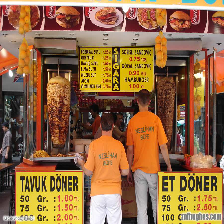

In [39]:
tf.keras.preprocessing.image.load_img(stall_path, target_size=(224,224))

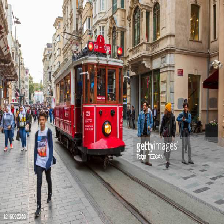

In [40]:
tf.keras.preprocessing.image.load_img(tram_path, target_size=(224,224))

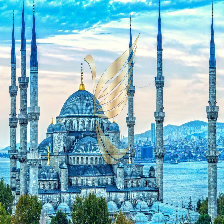

In [41]:
tf.keras.preprocessing.image.load_img(mosque_path, target_size=(224,224))

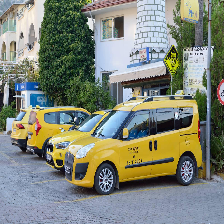

In [42]:
tf.keras.preprocessing.image.load_img(taxi_path, target_size=(224,224))

In [63]:
print(f'''stall:{np.round(model.predict(stall),3)}''')

1/1 [==============================] - 0s 67ms/step
stall:[[0.997 0.001 0.    0.002]]


In [64]:
print(f'''tram:{np.round(model.predict(tram),3)}''')

1/1 [==============================] - 0s 69ms/step
tram:[[0. 1. 0. 0.]]


In [65]:
print(f'''mosque:{np.round(model.predict(mosque),3)}''')

1/1 [==============================] - 0s 114ms/step
mosque:[[0.    0.    0.999 0.001]]


In [66]:
print(f'''taxi:{np.round(model.predict(taxi),3)}''')

1/1 [==============================] - 0s 66ms/step
taxi:[[0.003 0.003 0.    0.993]]


In [67]:
simitbreadcart_path = '/content/drive/MyDrive/SkillWorkshop/ImageClassificationTestImage/Istanbulsimitcicart28.jpeg'
simitbreadcart = load_image(simitbreadcart_path)

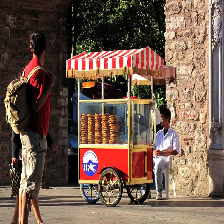

In [68]:
tf.keras.preprocessing.image.load_img(simitbreadcart_path, target_size=(224,224))

In [69]:
print(f'''simitbreadcart:{np.round(model.predict(simitbreadcart),3)}''')

1/1 [==============================] - 0s 65ms/step
simitbreadcart:[[0.997 0.002 0.    0.   ]]
